# Wine Project Part A
### Brett Karsten 
### Applied Stat Methods 001




## Step 1: Import the appropriate packages into our code

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

## Step 2: Load the csv file into python 

In [2]:
Red_Wine = pd.read_csv("/Users/brettkarsten/VS code/Applied Stat methods project/Wine Quality/winequality-red.csv", header=0)

Displaying the `head()` of the data fram to see if the format is correct. The next code block just prints the first 5 rows of each variable. 

In [3]:
print(Red_Wine.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

# **Question 1:** What is the sample size?

### In the next code block we will get the info of the data frame to see the range or sample size.
### The sample size is **1599** for the red wine data set

This was done by using the `info()` function within the pandas library

In this `info()` section, python also gives the data types. 11 of the 12 variables contain **floats** (values with decimals). These are continuous values. The **quality** column contains **integers**, which are discrete values.

In [4]:
print(Red_Wine.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


# **Question 2:** Any outliers? Do you have any concerns about the data quality? 

To have a glance at the distributions, histograms and boxplots were produced to observe the data visually. Before the plots are analyzed, observing the data is always a good idea. This can be done using the `describe()` function from the pandas package. 

In [5]:
print(Red_Wine.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

To make this more clear, a loop will run through each column and compute the mean, median, minimum and maximum values. 

In [6]:
for col in Red_Wine.columns[:12]:
    col_data = Red_Wine[col]
    col_mean = round(col_data.mean(), 3) # I just rounded to three decimal places for good measure 
    col_median = round(col_data.median(), 3)
    col_min = col_data.min()
    col_max = col_data.max()

# f strings allow for the combination of text and variables in an easy way 

    print(f"Column: {col}")
    print(f"Mean: {col_mean}")
    print(f"Median: {col_median}")
    print(f"Min: {col_min}")
    print(f"Max: {col_max}")
    print("----------------------") # this is just used to separate each of the 12 columns to look at all the data more closely 

Column: fixed acidity
Mean: 8.32
Median: 7.9
Min: 4.6
Max: 15.9
----------------------
Column: volatile acidity
Mean: 0.528
Median: 0.52
Min: 0.12
Max: 1.58
----------------------
Column: citric acid
Mean: 0.271
Median: 0.26
Min: 0.0
Max: 1.0
----------------------
Column: residual sugar
Mean: 2.539
Median: 2.2
Min: 0.9
Max: 15.5
----------------------
Column: chlorides
Mean: 0.087
Median: 0.079
Min: 0.012
Max: 0.611
----------------------
Column: free sulfur dioxide
Mean: 15.875
Median: 14.0
Min: 1.0
Max: 72.0
----------------------
Column: total sulfur dioxide
Mean: 46.468
Median: 38.0
Min: 6.0
Max: 289.0
----------------------
Column: density
Mean: 0.997
Median: 0.997
Min: 0.99007
Max: 1.00369
----------------------
Column: pH
Mean: 3.311
Median: 3.31
Min: 2.74
Max: 4.01
----------------------
Column: sulphates
Mean: 0.658
Median: 0.62
Min: 0.33
Max: 2.0
----------------------
Column: alcohol
Mean: 10.423
Median: 10.2
Min: 8.4
Max: 14.9
----------------------
Column: quality
Mean: 5

We can see by looking at the above values for each of the columns that the presence of outliers are skewing many of the distributions.

# **Question 3:** How can you summarize the data of each variable in a concise way? What statistics are you going to present?

## Mean and Median 

- The mean represents the average among the values within a data set. It is very sensitive to outliers. 
- The median represents the 50% percentile or the center of the data. It is robust to outliers and more common in reporting. 

## Standard Deviation and Variance 

- Standard deviation and variance provide details about the spread of data compared to the mean. 
- A large standard deviation and variance indicates greater variability in data.

## Percentiles 

- A percentile is a statistic indicating the value below which a given percentage of observation falls.

## Skewness (Visualizations)

- We are able to see skewness from visualizations such as histograms or boxplots.

In [7]:
# This code block will display the standard deviation and variance for each variable 


for col in Red_Wine.columns[:12]:
    col_data = Red_Wine[col]
    col_sd = round(np.std(col_data), 3)
    col_var = round(np.var(col_data), 3)

    print(f"Column: {col}")
    print(f"Standard Deviation: {col_sd}")
    print(f"Variance: {col_var}")
    print("------------------")

Column: fixed acidity
Standard Deviation: 1.741
Variance: 3.03
------------------
Column: volatile acidity
Standard Deviation: 0.179
Variance: 0.032
------------------
Column: citric acid
Standard Deviation: 0.195
Variance: 0.038
------------------
Column: residual sugar
Standard Deviation: 1.409
Variance: 1.987
------------------
Column: chlorides
Standard Deviation: 0.047
Variance: 0.002
------------------
Column: free sulfur dioxide
Standard Deviation: 10.457
Variance: 109.346
------------------
Column: total sulfur dioxide
Standard Deviation: 32.885
Variance: 1081.426
------------------
Column: density
Standard Deviation: 0.002
Variance: 0.0
------------------
Column: pH
Standard Deviation: 0.154
Variance: 0.024
------------------
Column: sulphates
Standard Deviation: 0.169
Variance: 0.029
------------------
Column: alcohol
Standard Deviation: 1.065
Variance: 1.135
------------------
Column: quality
Standard Deviation: 0.807
Variance: 0.652
------------------


In [8]:
# This code block will display the range within 2 standard deviations of the mean for each variable. 
# In other words, 95% of values will fall between the lower and upper bounds


lower_end = []
upper_end = []



for col in Red_Wine.columns[:12]:
    col_data = Red_Wine[col]
    col_sd = round(np.std(col_data), 3)
    col_mean = round(np.mean(col_data), 3)

    lower_bound = col_mean - 2 * col_sd
    upper_bound = col_mean + 2 * col_sd
    
    lower_end.append(lower_bound)
    upper_end.append(upper_bound)

    print(f"Column: {col}")
    print(f"Lower End: {lower_bound}")
    print(f"Upper End: {upper_bound}")
    print("------------------")

Column: fixed acidity
Lower End: 4.838
Upper End: 11.802
------------------
Column: volatile acidity
Lower End: 0.17000000000000004
Upper End: 0.886
------------------
Column: citric acid
Lower End: -0.119
Upper End: 0.661
------------------
Column: residual sugar
Lower End: -0.2789999999999999
Upper End: 5.357
------------------
Column: chlorides
Lower End: -0.007000000000000006
Upper End: 0.181
------------------
Column: free sulfur dioxide
Lower End: -5.0390000000000015
Upper End: 36.789
------------------
Column: total sulfur dioxide
Lower End: -19.301999999999992
Upper End: 112.238
------------------
Column: density
Lower End: 0.993
Upper End: 1.001
------------------
Column: pH
Lower End: 3.003
Upper End: 3.6189999999999998
------------------
Column: sulphates
Lower End: 0.32
Upper End: 0.996
------------------
Column: alcohol
Lower End: 8.293
Upper End: 12.553
------------------
Column: quality
Lower End: 4.022
Upper End: 7.25
------------------


In [9]:
quantiles = [0.1, 0.25, 0.5, 0.75, 0.9] # this is specifying which percentages


quantile_data = Red_Wine.quantile(quantiles)


print(quantile_data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0.10            6.5             0.310        0.010             1.7      0.060   
0.25            7.1             0.390        0.090             1.9      0.070   
0.50            7.9             0.520        0.260             2.2      0.079   
0.75            9.2             0.640        0.420             2.6      0.090   
0.90           10.7             0.745        0.522             3.6      0.109   

      free sulfur dioxide  total sulfur dioxide   density    pH  sulphates  \
0.10                  5.0                  14.0  0.994556  3.12       0.50   
0.25                  7.0                  22.0  0.995600  3.21       0.55   
0.50                 14.0                  38.0  0.996750  3.31       0.62   
0.75                 21.0                  62.0  0.997835  3.40       0.73   
0.90                 31.0                  93.2  0.999140  3.51       0.85   

      alcohol  quality  
0.10      9.3      

In [10]:
# for reference, I am going to display the describe() function again

print(Red_Wine.describe()) 

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

## Discussion 

### Fixed Acidity:

- The mean = 8.32 and the median = 7.9. This indicates data skewed to the right. 
- The larger a standard deviation, the more variability in the data. The sd for this column is 1.74, which means the data is pretty varied.
- 10% of values will fall below 6.5 and 10% will be above 10.7 

### Volatile Acidity: 

- The mean = 0.527 and the median = 0.52. This indicates almost symmetric data with some variability.
- The standard deviation is 0.179, so some variability is still present, but not as much as fixed acidity. 
- 10% of values will fall below 0.310 and 10% will be above 0.745

### Citric Acid:

- The mean = 0.271 and the median = 0.26. This indicates some variability. 
- The standard deviation is 0.194, which confirms variability.
- 10% of values will be below 0.010 and 10% will be above 0.522. This range explains the mismatch bewteen the mean / median.

### Residual Sugar: 

- The mean = 2.539 and the median = 2.2. Right-skewed data is present. 
- The standard deviation is 1.41. This is an indicator of moderate variability 
- 10% of values will fall below 1.7 and 10% will be above 3.6.

### Chlorides:

- The mean = 0.0875 and the median = 0.079. Right-skewed data can be observed. 
- The standard deviation is 0.0471.
- 10% of values fall below 0.060 and 10% are above 0.109. This range explains the variability in data.

### Free Sulfur Dioxides:

- The mean = 15.874 and the median = 14.0. The data is skewed to the right.
- The standard deviation is 10.46. This is a very large variability. 
- 10% of values will fall below 5.0 and 10% of values will be above 31.0. A wide range of data is present. 

### Total Sulfur Dioxides: 

- The mean = 46.47 and the median = 38.0. Large variability in the data is present and it skews towards the right.
- The standard deviation = 32.90, which is quite large.
- The range can explain this variability with 10% of the values falling below 14.0 and 10% being above 93.2. 

### Density:

- The mean = 0.9967 and the median = 0.9967. This represents symmetric data and would indicate a normal distribution 
- The standard deviation is 0.001887 which indicates low variability 
- 10% of values fall below 0.995 and 10% are above 0.999.

### pH: 

- The mean = 3.31 and the median = 3.31. This represents symmetric data again and a normal distribution 
- The standard deviation is 0.154. The variability is moderate. 
- 10% of values will be below 3.12 and 10% will be above 3.51.

### Sulfates: 

- The mean = 0.658 and the median = 0.620. The data is skewed to the right. 
- The standard deviation is 0.170. 
- 10% of values will fall below 0.50 and 10% will be above 0.85

### Alcohol: 

- The mean = 10.42 and the median = 10.2. There is some variability to this column. 
- The standard deviation is 1.065. 
- 10% of values can be found below 9.3 and 10% can be found above 12.0.

### Quality: 

- Quality is a variable that was given a score. These values were discrete and not continuous like the rest of the variables.
- The scores could range from 0-10.
- The values ranged from 3 - 10 and had a mean of 5.64.

# **Question 4 / 5:** How can you visualize the distribution of each variable? Do you see any skewed distributions?

### Comments on Data Quality

Just by looking at the minimum and maximum values, wide distributions can be observed. It would make sesne that the distributions would be skewed. While some of the median and max values are similar (which would indicate quality data), the range is large so outliers would be the cause of this. The mean is affected by these outliers, however, the median is robust. The plots generated next will display these inferences visually.

### Histograms

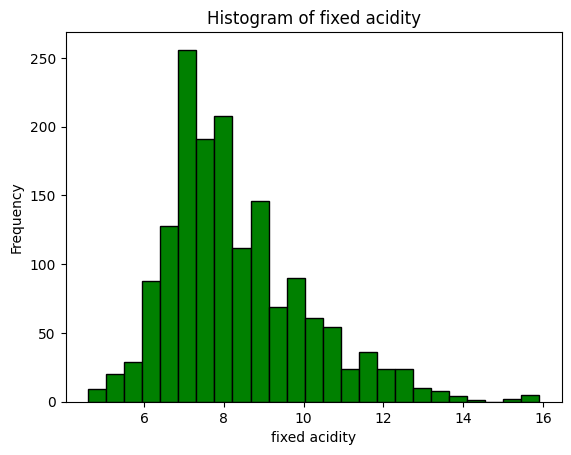

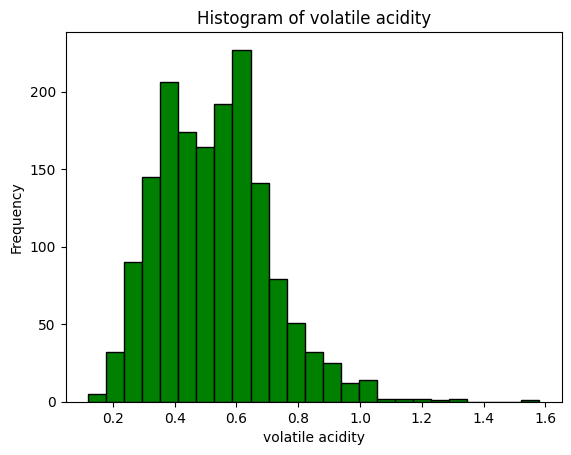

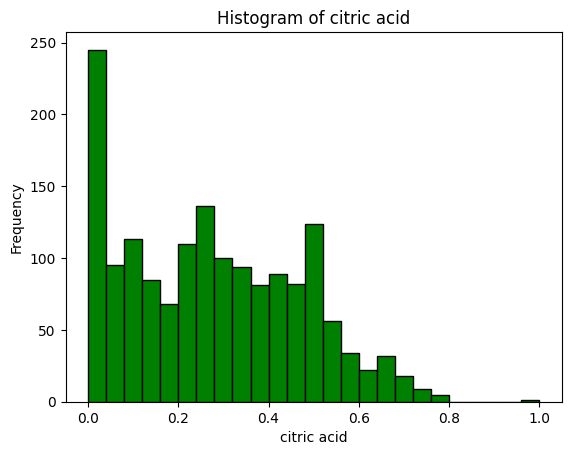

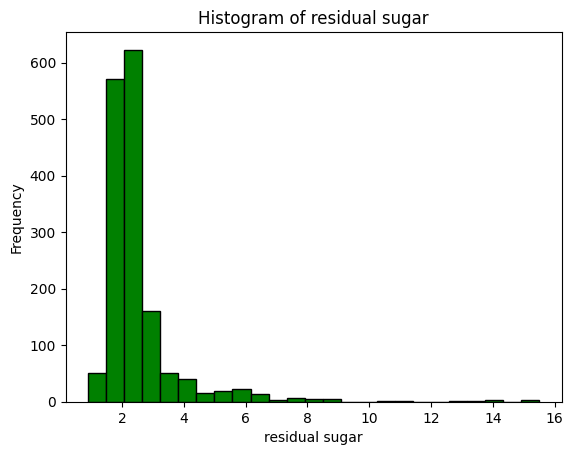

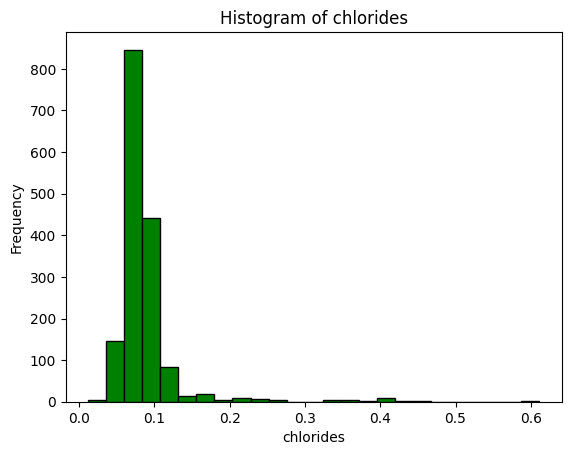

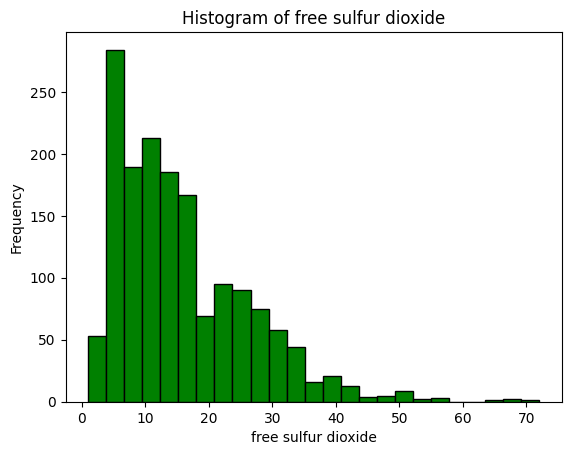

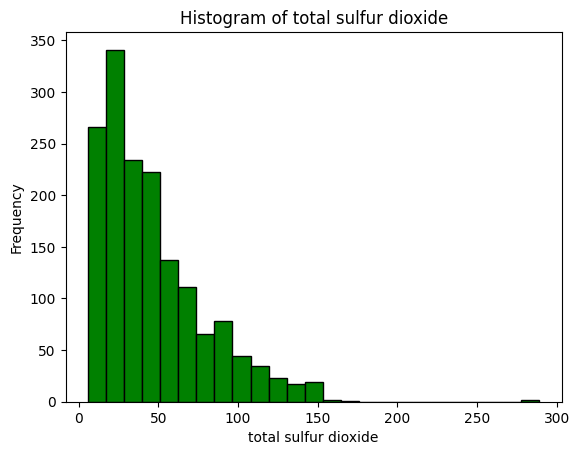

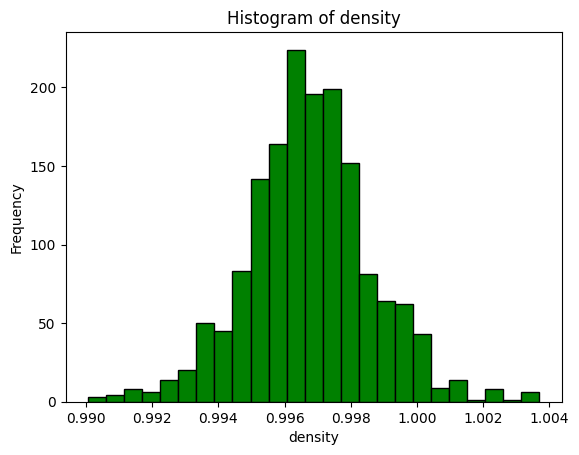

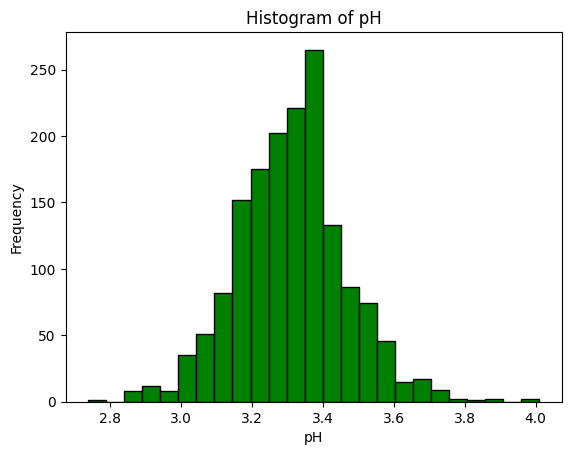

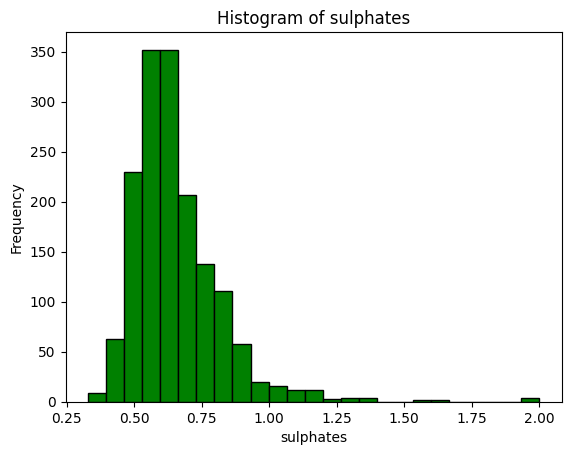

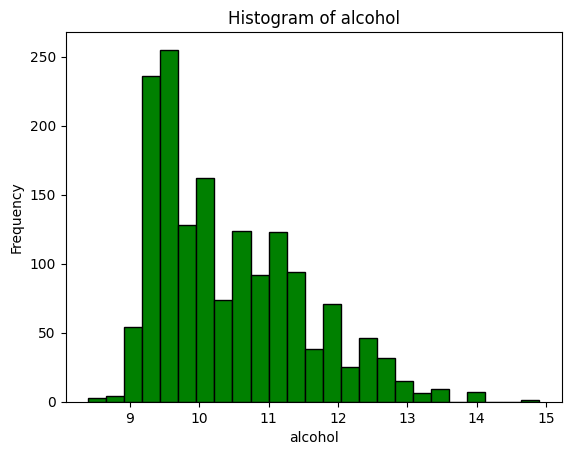

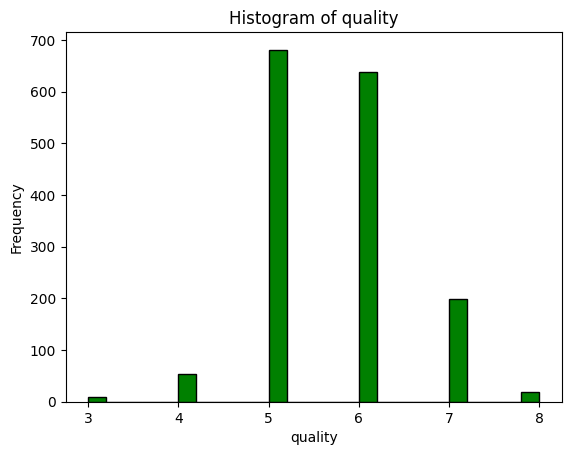

In [13]:
for col in Red_Wine.columns[:12]:
    plt.figure()
    plt.hist(Red_Wine[col], bins=25, color='green', edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

### Boxplots

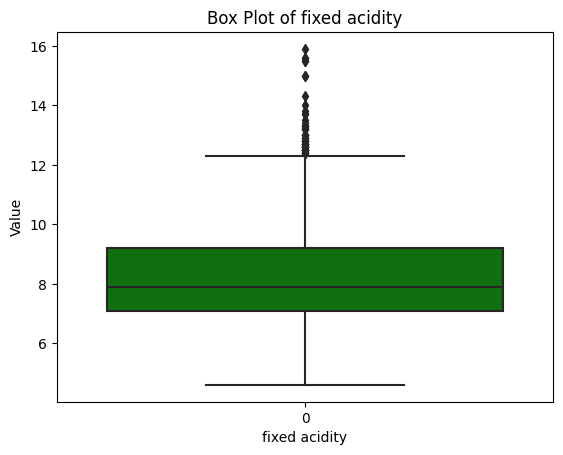

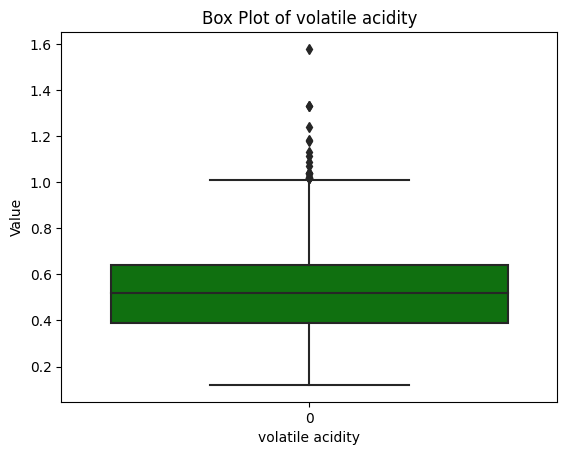

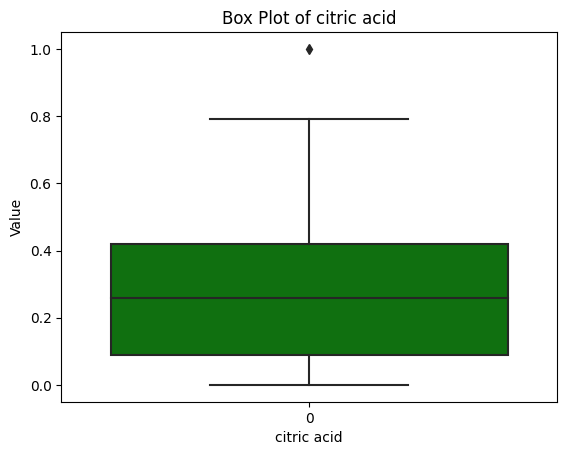

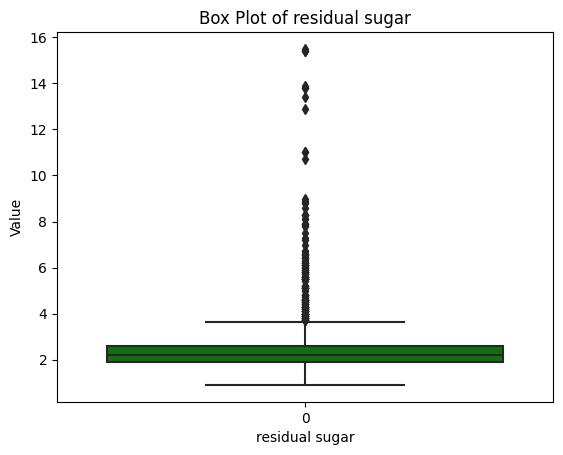

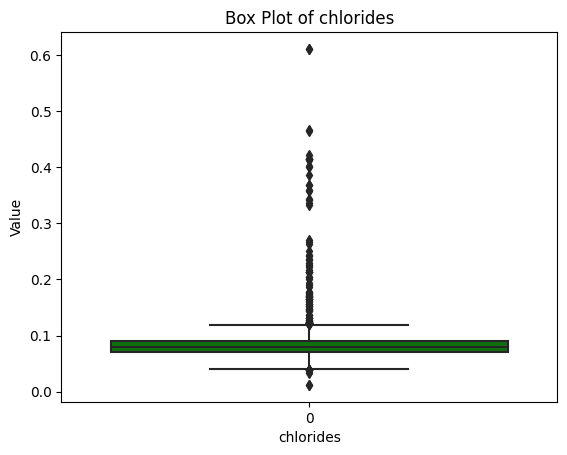

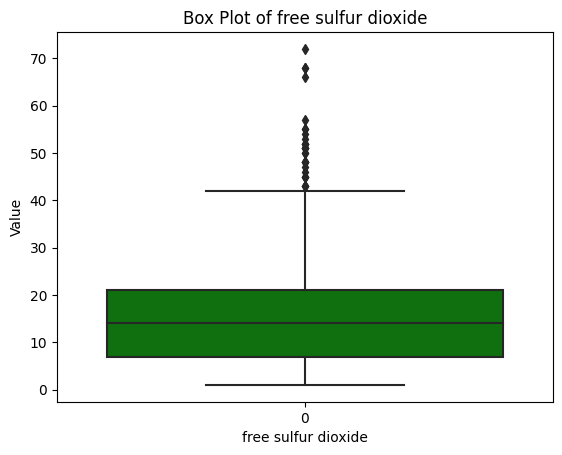

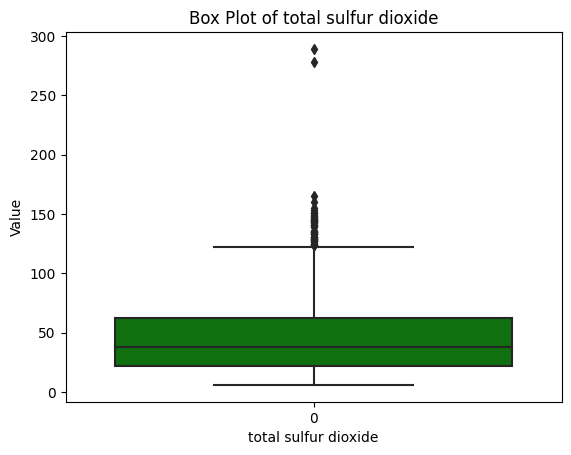

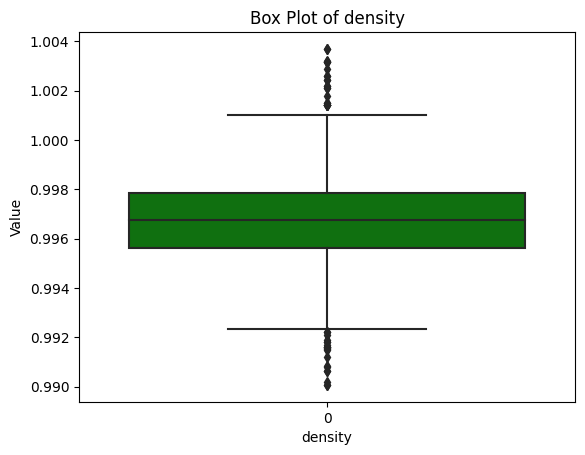

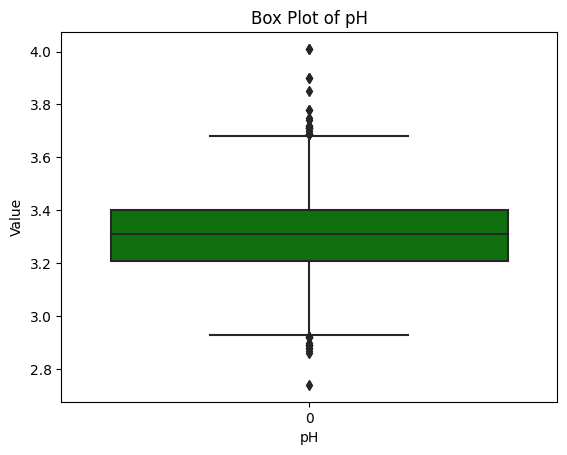

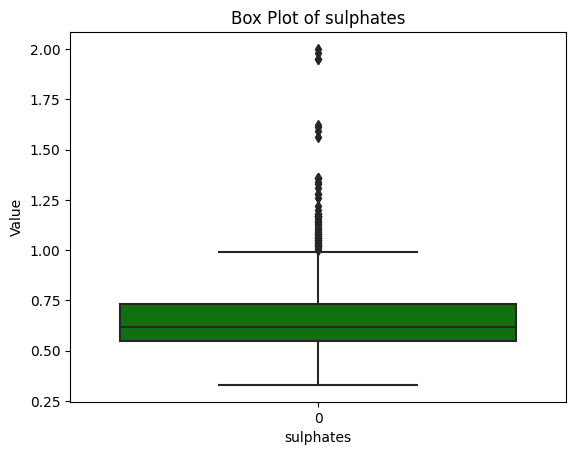

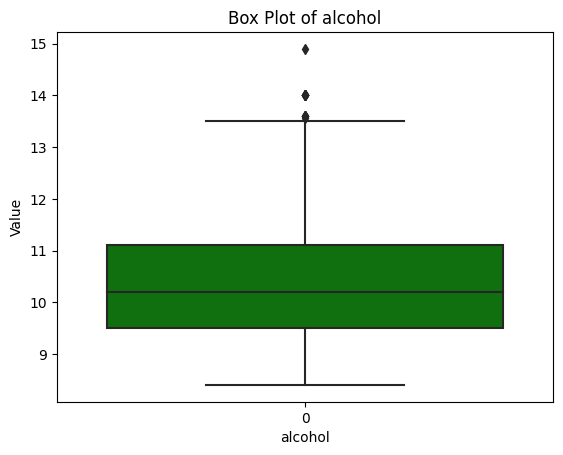

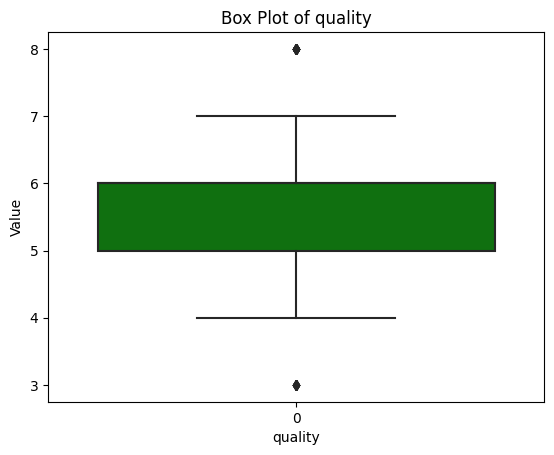

In [12]:
for col in Red_Wine.columns[:12]:
    plt.figure()
    sns.boxplot(data = Red_Wine[col], color = "green")
    plt.title(f"Box Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Value")
    plt.show()

From the plots generated in the loops above, we can already see many distributions are skewed. Each of them will be discussed. 

### Histogram / Boxplot: Fixed Acidity 

- The histogram may look normal to some, but we can see it is skewed slightly to the right. 
- Looking at the boxplot, we can also see that the skewed plot is due to the outliers towards the top of the graph.
- While the boxplot displays several outliers, there are several points below the 14 value that could be normal for this distribution.
- The outliers above the 14 mark upwards towards the 16 mark would be considered the true outliers for the fixed acidity. 

### Histogram / Boxplot: Volatile Acidity 

- The histogram is slightly less skewed than the fixed acidity, but the boxplot displays the presence of outliers. These outliers would be above the 1.2 mark and upwards towards the 1.6.

### Histogram / Boxplot: Citric Acid 

- The histogram produced for the citric acid appears to have a few outliers (around the value of 1). Many of the values seem to fall towards 0.
- Comparing the mean and median, those values fall at 0.271 and 0.26, respectively. 
- Looking at the boxplot for citric acid, we can see it is somewhat positvely skewed.

### Histogram / Boxplot: Residual Sugar 

- From both the histograms and boxplots, the data is very skewed.
- Several outliers can be seen in the boxplot.
- Since there is a high density of outliers below the 10 value, it looks like the values above the 10 are the true outliers.

### Histogram / Boxplot: Chlorides

- The chloride data looks very similar to the residual sugar plots.
- The data is skewed right and contains a large amount of outliers.
- There are two areas on the boxplot where the outliers could be quality data points. More specifically, the values below 0.3 and the values hovering around 0.4

### Histogram / Boxplot: Free Sulfur Dioxide

- From looking at the mean and max values (1 and 72, respectively), the data is heavily skewed. The mean was 15.875 and the median was 14.
- This skewness to the right can be seen in the histogram as well.
- The boxplot displays many outliers. Much like the other plots, there is a concentration of outliers found in a certain range and then more outliers farther away from the distribution. More statistical tests will be taken to look closer at these outliers, but for now, it looks like the true outliers are above the 60 mark. 

### Histogram / Boxplot: Total Sulfur Dioxide 

- The histogram for the total sulfure dioxide looks very similar to the previous plot of sulfure dioxide. The data is skewed to the right.
- The outliers concentrate in two areas, but from first glance it looks like the main outliers skewing the data reside above the 250 mark.

### Histogram / Boxplot: Density 

- This distribution looks normal. 
- When looking at the boxplots, the whiskers are evenly spaced from the center and there seems to be an even number of outliers on both sides.
- The mean and median values are almost identical as well, which indicates quality data.

### Histogram / Boxplot: pH

- This distribution looks similar to that of density. It appears to be normal. 
- The boxplot looks symmetrical. This is in contrast to most of the other plots which display skewness. 
- The whiskers are evenly spaced from the center.
- The mean and median values are also almost identical, which indicates quality data.

### Histogram / Boxplot: Sulfates 

- The outliers above 1.30 seem to be skewing the data to the right. 
- This is shown in both the boxplot and the histogram. 
- The mean and median are somewhat close. Another test will be done to look at the true values.

### Histogram / Boxplot: Alcohol

- The data is skewed for alcohol as well due to the presence of outliers. 
- Along with the rest of the variables, a percentile test will be run to observe the percentage of values above or below.

### Histogram / Boxplot: Quality 

- The quality boxplot looks symmetrical with a few outliers. 
- This data is also made up of discrete values compared to continuous. The wine quality was rated from 0-10.